# Distribution Definition


In [145]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=50, sd=1, low=0, up=100):
    return truncnorm(
        (low - mean) / sd, (up - mean) / sd, loc=mean, scale=sd)

# import data


In [168]:
import numpy as np
import pandas as pd

UG_courses = ["BOA","BOB","BOC","BOE","BSC"]

Full_df = pd.read_csv("student_database_complete.csv")
Full_df = Full_df.rename(columns={'Unnamed: 0': 'index_order'})
Full_df = Full_df.sort_values(by=['top5_bach_bach'])
Full_df = Full_df.reset_index(drop=True)
student_num_list =[len(Full_df[Full_df['top5_bach_bach']== x]) for x in mean_variance_dict]
student_num_dict = dict(zip(UG_courses, student_num_list))
print(student_num_dict)
print("size:",len(Full_df))

{'BOA': 5606, 'BOB': 1887, 'BOC': 6328, 'BOE': 2192, 'BSC': 8004}
size: 24017


In [169]:
Full_df.head()


,index_order,STU_ID_PROXY,COURSE_CREDITS_REQ_bach,FACULTY_CODE_bach,LOCATION_CODE_bach,STUDY_YEAR_bach,N_SUBJECTS_bach,CODE_DESCR_bach,top5_bach_bach,COURSE_CODE,...,N_SUBJECTS_mast,CODE_DESCR_mast,IS_GENDER_MALE,AGE_BAND,STATE,IS_INTERNATIONAL,HOME_LANGUAGE,ATAR_BAND,LANGUAGE_TEST_TYPE,LANGUAGE_TEST_SCORE
0,24016,41824,300.0,100,U,2020,1,Bachelor of Arts,BOA,NaN,...,NaN,NaN,0,19,TAS,0,English,Band6 - 98.00 - 99.85,Tertiary English,
1,4340,136262,300.0,100,U,2014,8,Bachelor of Arts,BOA,NaN,...,NaN,NaN,0,18,VIC,0,Not English,Band4 - 90.00 - 94.95,Not Entered,
2,13228,17201,300.0,100,U,2017,9,Bachelor of Arts,BOA,NaN,...,NaN,NaN,0,18,ACT,0,English,Band6 - 98.00 - 99.85,Not Entered,
3,13229,131436,300.0,100,U,2017,9,Bachelor of Arts,BOA,NaN,...,NaN,NaN,0,18,VIC,0,English,Band6 - 98.00 - 99.85,Not Entered,
4,13234,8689,100.0,100,U,2017,6,Bachelor of Arts (Degree with Honours),BOA,NaN,...,NaN,NaN,0,19,VIC,0,English,Band4 - 90.00 - 94.95,Not Entered,


# generate synthetic grade data

In [151]:
import numpy as np
import pandas as pd

# initialisation
UG_courses = ["BOA","BOB","BOC","BOE","BSC"]
# arts, biomedicine, commerce, environment, science
UG_df = pd.DataFrame({})
mean_variance_list =[(66.6,16.87),(56.67,16,79),(61.69,21.44),(60.46,17.33),(51.81,21.25)]
mean_variance_dict = dict(zip(UG_courses, mean_variance_list))
for course in mean_variance_dict.items():
    df=pd.DataFrame({})
    num = student_num_dict[course[0]]
    df["Mean"] = list(get_truncated_normal(mean = course[1][0], sd = course[1][1],low = 40, up=100).rvs(num))
    df["Variance"] = list(get_truncated_normal(mean = 5, sd = 1,low = 0, up=10).rvs(num))
    #   call function get_truncated_normal(mean,sd,low,up).rvs(size)
    df["UG_course"] = course[0]
    UG_df =  pd.concat([UG_df, df], ignore_index=True)
UG_df = UG_df.round(0)
print("size:", len(UG_df))
UG_df.head()

size: 24017


,Mean,Variance,UG_course
0,92.0,4.0,BOA
1,68.0,4.0,BOA
2,61.0,6.0,BOA
3,76.0,5.0,BOA
4,62.0,3.0,BOA


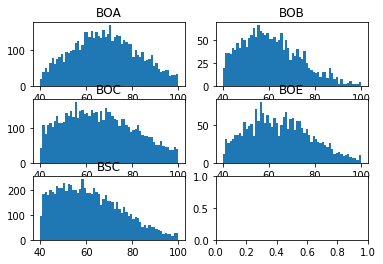

In [152]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3, 2)
x = np.array(UG_df.loc[UG_df["UG_course"] == UG_courses[0]]["Mean"])
axs[0, 0].hist(x,bins = len(set(x))-1)
axs[0, 0].set_title(UG_courses[0])

x = np.array(UG_df.loc[UG_df["UG_course"] == UG_courses[1]]["Mean"])
axs[0, 1].hist(x,bins = len(set(x))-1)
axs[0, 1].set_title(UG_courses[1])

x = np.array(UG_df.loc[UG_df["UG_course"] == UG_courses[2]]["Mean"])
axs[1, 0].hist(x,bins = len(set(x))-1)
axs[1, 0].set_title(UG_courses[2])

x = np.array(UG_df.loc[UG_df["UG_course"] == UG_courses[3]]["Mean"])
axs[1, 1].hist(x,bins = len(set(x))-1)
axs[1, 1].set_title(UG_courses[3])

x = np.array(UG_df.loc[UG_df["UG_course"] == UG_courses[4]]["Mean"])
axs[2, 0].hist(x,bins = len(set(x))-1)
axs[2, 0].set_title(UG_courses[4])

plt.show()

In [153]:
for index, row in UG_df.iterrows():
#     print(row['Mean'], row['Variance'])
    mark_list= list(get_truncated_normal(mean = row['Mean'], sd =  row['Variance'],low = 40, up=100).rvs(16))
    for i in range(0,16):
        UG_df.at[index,row['UG_course']+'subject'+str(i+1) ]= mark_list[i]
    
UG_df.head()

,Mean,Variance,UG_course,BOAsubject1,BOAsubject2,BOAsubject3,BOAsubject4,BOAsubject5,BOAsubject6,BOAsubject7,...,BSCsubject7,BSCsubject8,BSCsubject9,BSCsubject10,BSCsubject11,BSCsubject12,BSCsubject13,BSCsubject14,BSCsubject15,BSCsubject16
0,92.0,4.0,BOA,96.942544,88.862542,88.575023,96.742230,94.090209,86.779247,92.944910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.0,4.0,BOA,62.695967,70.015676,66.270912,65.508286,66.765778,68.145159,70.419348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,6.0,BOA,65.899555,66.396499,50.960655,59.135939,65.791208,58.199289,69.858452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.0,5.0,BOA,78.578192,79.240844,83.668983,77.446330,71.746621,82.879817,86.458037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62.0,3.0,BOA,60.837674,62.101954,63.487996,67.163785,62.744615,62.146911,64.460004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# concat df

In [171]:
# DF = Full_df+UG_df
DF = pd.concat([Full_df, UG_df],axis = 1)
print(len(DF))
DF.head()


24017


,index_order,STU_ID_PROXY,COURSE_CREDITS_REQ_bach,FACULTY_CODE_bach,LOCATION_CODE_bach,STUDY_YEAR_bach,N_SUBJECTS_bach,CODE_DESCR_bach,top5_bach_bach,COURSE_CODE,...,BSCsubject7,BSCsubject8,BSCsubject9,BSCsubject10,BSCsubject11,BSCsubject12,BSCsubject13,BSCsubject14,BSCsubject15,BSCsubject16
0,24016,41824,300.0,100,U,2020,1,Bachelor of Arts,BOA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4340,136262,300.0,100,U,2014,8,Bachelor of Arts,BOA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13228,17201,300.0,100,U,2017,9,Bachelor of Arts,BOA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13229,131436,300.0,100,U,2017,9,Bachelor of Arts,BOA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13234,8689,100.0,100,U,2017,6,Bachelor of Arts (Degree with Honours),BOA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# export df

In [172]:
DF.to_csv("synthetic_Data_truncated_normal_approach2.csv")
